<a href="https://colab.research.google.com/github/sergiynesterenko90/feranec/blob/main/Handwriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://www.tensorflow.org/install/pip
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train[0].shape

(28, 28)

In [6]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Label: 0


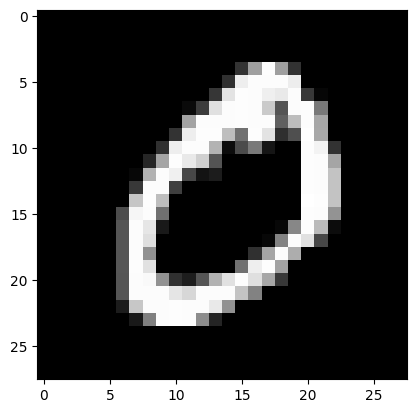

In [7]:
N = 1

plt.imshow(x_train[N], cmap="gray")
print("Label:", y_train[N])

In [8]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(10),
    ]
)

In [9]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.56160915,  0.14154235, -0.45914608,  0.27737206,  0.32981563,
         0.49882537,  0.13002956,  0.26946637,  0.16099297, -0.543774  ]],
      dtype=float32)

In [10]:
tf.nn.softmax(predictions).numpy()

array([[0.14494213, 0.09522741, 0.05222594, 0.10908174, 0.11495503,
        0.1361219 , 0.09413736, 0.10822278, 0.09709777, 0.04798802]],
      dtype=float32)

In [11]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [12]:
loss_fn(y_train[:1], predictions).numpy()

1.9942045

In [13]:
model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])

In [14]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 3ms/step - loss: 0.2273 - accuracy: 0.9309
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1015 - accuracy: 0.9687
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0742 - accuracy: 0.9763
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0600 - accuracy: 0.9811
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0493 - accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0439 - accuracy: 0.9854
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0367 - accuracy: 0.9883
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0335 - accuracy: 0.9891
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0314 - accuracy: 0.9895
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.027

In [15]:
eval = model.evaluate(x_test, y_test, verbose=2)
for name, ev in zip(model.metrics_names, eval):
    print(name, ev)

313/313 - 1s - loss: 0.0715 - accuracy: 0.9818 - 672ms/epoch - 2ms/step
loss 0.07148239761590958
accuracy 0.9818000197410583


In [16]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [17]:
tf.math.confusion_matrix(y_test, tf.argmax(probability_model(x_test), axis=1))

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    1,    0,    0,    2,    1,    2,    1,    2,    1],
       [   0, 1122,    2,    2,    2,    0,    2,    1,    4,    0],
       [   4,    0, 1007,    3,    1,    0,    1,    5,   10,    1],
       [   0,    0,    1,  993,    0,    4,    0,    6,    3,    3],
       [   3,    0,    1,    0,  959,    0,    3,    4,    0,   12],
       [   2,    0,    0,    9,    2,  873,    2,    0,    3,    1],
       [   3,    2,    0,    0,    2,    7,  944,    0,    0,    0],
       [   0,    2,    7,    1,    0,    0,    0, 1008,    1,    9],
       [   2,    1,    1,    4,    0,    2,    1,    2,  956,    5],
       [   2,    2,    0,    2,    8,    3,    0,    3,    3,  986]],
      dtype=int32)>

In [18]:
openmv_model = tf.keras.Sequential(
    [
        tf.keras.layers.Reshape((28, 28), input_shape=(28, 28, 1)),
        probability_model,
    ]
)

In [19]:
def representative_dataset():
    for image in x_test:
        img = tf.expand_dims(image, axis=2)
        yield [np.array([[img]], dtype=np.float32)]


converter = tf.lite.TFLiteConverter.from_keras_model(openmv_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset

# https://github.com/openmv/tensorflow-lib/blob/2abbaee8458379c83444fc391cde5e748becfd55/libtf.cc
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8

tflite_quant_model = converter.convert()

/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/convert.py:789: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


In [20]:
with open("model.tflite", "wb") as output:
    print(len(tflite_quant_model))
    output.write(tflite_quant_model);

239592
